# Data Analysis

In [19]:
import os
import pandas as pd
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [20]:
DIR = 'images'
file_names = os.listdir(DIR)
file_names[:10]

['00003aeb-ace5-43bf-9a0c-dc31a03e9cd2.jpg',
 '00070a23-9faf-4682-8243-59f307880f4b.jpg',
 '000d31f6-44b5-4758-8d86-c4fcfb234392.jpg',
 '001068a8-86c3-4029-a9d9-1e27015e7e64.jpg',
 '00143901-a14c-4600-960f-7747b4a3a8cd.jpg',
 '00149032-3dd6-426e-9bc0-d53032536a42.jpg',
 '00208c77-ee58-4b63-bc1a-b9b3aa4f1be0.jpg',
 '0028956e-9962-46f0-ad45-2c42f8a59d94.jpg',
 '002e88c2-e0ce-4a4b-9670-eddc3d99accc.jpg',
 '002eb5b8-6541-42a3-9596-0d94f7b866ae.jpg']

In [21]:
data = pd.read_csv('images.csv')
data.head()

,image,sender_id,label,kids
0,4285fab0-751a-4b74-8e9b-43af05deee22,124,Not sure,False
1,ea7b6656-3f84-4eb3-9099-23e623fc1018,148,T-Shirt,False
2,00627a3f-0477-401c-95eb-92642cbe078d,94,Not sure,False
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa,43,T-Shirt,False
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0,189,Shoes,False


In [22]:
data['image'] = data['image']+'.jpg'
data_1 = data[['image', 'label']]
data_1.head()

,image,label
0,4285fab0-751a-4b74-8e9b-43af05deee22.jpg,Not sure
1,ea7b6656-3f84-4eb3-9099-23e623fc1018.jpg,T-Shirt
2,00627a3f-0477-401c-95eb-92642cbe078d.jpg,Not sure
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa.jpg,T-Shirt
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0.jpg,Shoes


In [23]:
data_1['image']

0       4285fab0-751a-4b74-8e9b-43af05deee22.jpg
1       ea7b6656-3f84-4eb3-9099-23e623fc1018.jpg
2       00627a3f-0477-401c-95eb-92642cbe078d.jpg
3       ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa.jpg
4       3b86d877-2b9e-4c8b-a6a2-1d87513309d0.jpg
                          ...                   
5398    dfd4079d-967b-4b3e-8574-fbac11b58103.jpg
5399    befa14be-8140-4faf-8061-1039947e329d.jpg
5400    5379356a-40ee-4890-b416-2336a7d84061.jpg
5401    65507fb8-3456-4c15-b53e-d1b03bf71a59.jpg
5402    32b99302-cec7-4dec-adfa-3d4029674209.jpg
Name: image, Length: 5403, dtype: object

### Remove corrupted images

In [24]:
path = Path(DIR).rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

images\040d73b7-21b5-4cf2-84fc-e1a80231b202.jpg


images\1d0129a1-f29a-4a3f-b103-f651176183eb.jpg
images\784d67d4-b95e-4abb-baf7-8024f18dc3c8.jpg
images\b72ed5cd-9f5f-49a7-b12e-63a078212a17.jpg
images\c60e486d-10ed-4f64-abab-5bb698c736dd.jpg
images\d028580f-9a98-4fb5-a6c9-5dc362ad3f09.jpg


In [25]:
corrupted = ['b72ed5cd-9f5f-49a7-b12e-63a078212a17.jpg', '1d0129a1-f29a-4a3f-b103-f651176183eb.jpg', 'c60e486d-10ed-4f64-abab-5bb698c736dd.jpg', 
            'd028580f-9a98-4fb5-a6c9-5dc362ad3f09.jpg', '040d73b7-21b5-4cf2-84fc-e1a80231b202.jpg', '784d67d4-b95e-4abb-baf7-8024f18dc3c8.jpg']

data_1 = data_1.drop(data_1[data_1['image'].isin(corrupted)].index, axis=0)

### Data Visualization

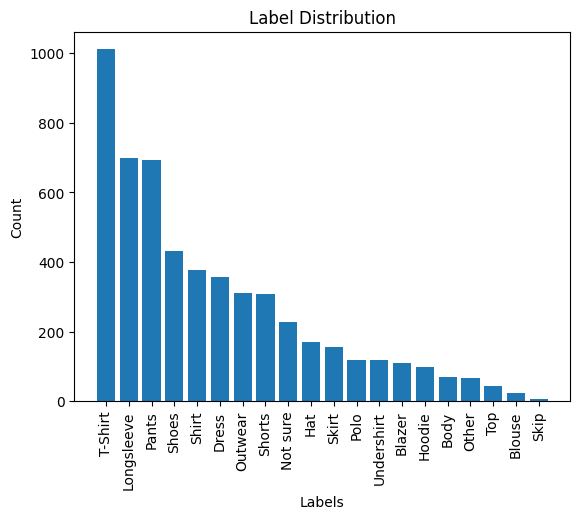

In [26]:
label_counts = data_1['label'].value_counts()

# Plot a bar chart of the label distribution
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Label Distribution')
plt.show()

In [27]:
class_names = list(data_1['label'].unique())
print(len(class_names))
class_names

20


['Not sure',
 'T-Shirt',
 'Shoes',
 'Shorts',
 'Shirt',
 'Pants',
 'Skirt',
 'Other',
 'Top',
 'Outwear',
 'Dress',
 'Body',
 'Longsleeve',
 'Undershirt',
 'Hat',
 'Polo',
 'Blouse',
 'Hoodie',
 'Skip',
 'Blazer']

In [28]:
labels_to_remove = ['Skip', 'Not sure', 'Other', 'Blouse']
data_1 = data_1[~data_1['label'].isin(labels_to_remove)]
class_names = list(data_1['label'].unique())
print(len(class_names))
class_names

16


['T-Shirt',
 'Shoes',
 'Shorts',
 'Shirt',
 'Pants',
 'Skirt',
 'Top',
 'Outwear',
 'Dress',
 'Body',
 'Longsleeve',
 'Undershirt',
 'Hat',
 'Polo',
 'Hoodie',
 'Blazer']

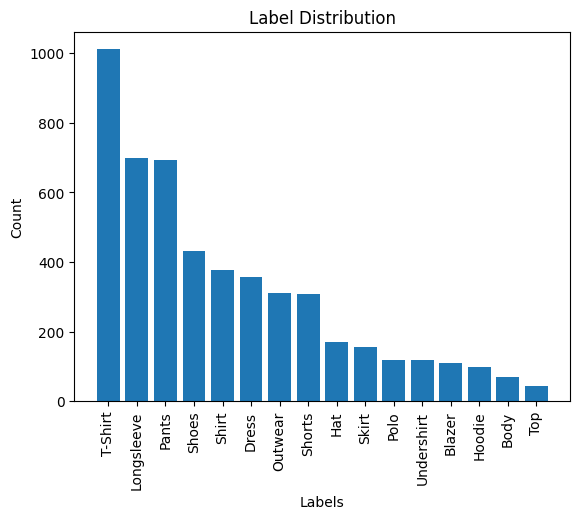

In [29]:
label_counts = data_1['label'].value_counts()

# Plot a bar chart of the label distribution
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Label Distribution')
plt.show()